### Model Comparison 

In [3]:
import numpy as np
import pylab as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
def calcAcc(clfs, clf_names, all_datasets, all_dataset_names):
    result = dict()
    for i in range(len(clfs)):
        clf = clfs[i]
        print('Accuracy using {}:'.format(clf_names[i]))
        for j in range(len(all_datasets)):
            X = all_datasets[j].data
            Y = all_datasets[j].target
            X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .4, random_state = 0)
            clf.fit(X_train, Y_train)
            predictions = clf.predict(X_test)
            score = accuracy_score(Y_test, predictions)
        
            if clf_names[i] not in result:
                result[clf_names[i]] = [score]
            else:
                result[clf_names[i]].append(score)
            
            print('- {} dataset: {}'.format(all_dataset_names[j], score))
    return result

In [5]:
def plotBars(N, result, x_labels):
    ind = np.arange(N)
    width = 0.15
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    keys = ['DecisionTreeClassifier', 'SVC', 'RandomForestClassifier', 'KNeighborsClassifier']
    colors = ['#2674f2', '#f9005b', '#bce8b7', '#686f7a']
    rects = ()
    clf = ()
    for i in range(len(result)):
        vals = result[keys[i]]
        rect = ax.bar(ind + (width * i), vals, width, color=colors[i])
        rects += (rect,)
        clf += (keys[i],)
        
    ax.set_ylabel('Accuracy')
    ax.set_xticks(ind + width)
    ax.set_xticklabels(x_labels)
    ax.legend(rects, clf, bbox_to_anchor=(1, 1))

    plt.show()

In [6]:
iris = datasets.load_iris()
wine = datasets.load_wine()
breast_cancer = datasets.load_breast_cancer()

new_datasets = [iris, wine, breast_cancer]
new_dataset_names = ['Iris', 'Wine', 'Breast Cancer']

new_clfs = [DecisionTreeClassifier(), SVC(), RandomForestClassifier(), KNeighborsClassifier()]
new_clf_names = [str(clf).split('(')[0] for clf in new_clfs]

new_result = calcAcc(new_clfs, new_clf_names, new_datasets, new_dataset_names)

Accuracy using DecisionTreeClassifier:
- Iris dataset: 0.95
- Wine dataset: 0.9583333333333334
- Breast Cancer dataset: 0.9078947368421053
Accuracy using SVC:
- Iris dataset: 0.95
- Wine dataset: 0.4861111111111111
- Breast Cancer dataset: 0.6359649122807017
Accuracy using RandomForestClassifier:
- Iris dataset: 0.9333333333333333
- Wine dataset: 0.9722222222222222
- Breast Cancer dataset: 0.9429824561403509
Accuracy using KNeighborsClassifier:
- Iris dataset: 0.95
- Wine dataset: 0.6666666666666666
- Breast Cancer dataset: 0.9517543859649122


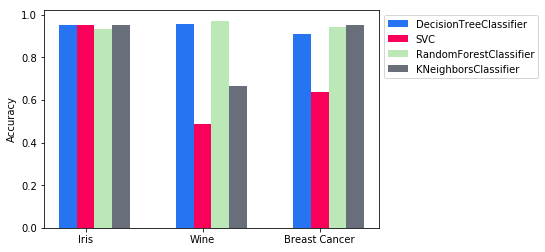

In [7]:
N = 3
plotBars(N, new_result, ('Iris', 'Wine', 'Breast Cancer'))